Customer Orders Distribution

In [19]:
!pip install pymysql

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

In [21]:
# Database connection parameters
db_params = {
    'host': 'localhost',
    'user': 'root',
    'password': '18blc1089*SENSE',
    'db': 'eperfume'
}

In [22]:
# SQL Query
order_query = """
SELECT c.first_name, c.last_name, COUNT(o.order_id) AS num_orders
FROM eperfume.Customer c
JOIN eperfume.Orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id
ORDER BY num_orders DESC;
"""

In [23]:
# Establishing connection and retrieving data
conn = pymysql.connect(**db_params)
df_orders = pd.read_sql(order_query, conn)
conn.close()

/var/folders/63/1_qpw77s0v582q7h7_rmghdw0000gn/T/ipykernel_31020/722096015.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders = pd.read_sql(order_query, conn)


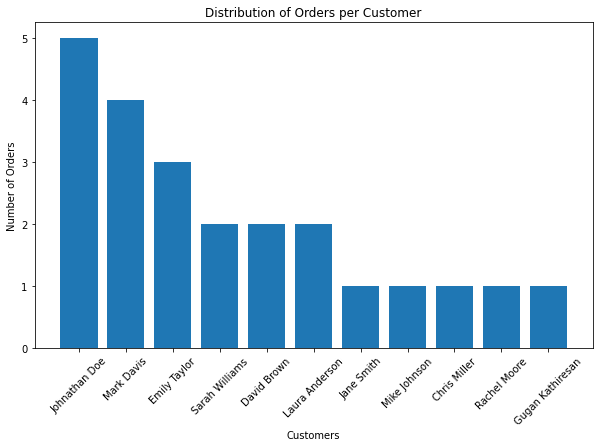

In [24]:
# Plotting
plt.figure(figsize=(10,6))
plt.bar(df_orders['first_name'] + ' ' + df_orders['last_name'], df_orders['num_orders'])
plt.xlabel('Customers')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders per Customer')
plt.xticks(rotation=45)
plt.show()

Product Category Sales

In [25]:
# SQL Query
sales_query = """
SELECT cat.category_name, SUM(oi.quantity * oi.price) AS total_sales
FROM eperfume.Products p
JOIN eperfume.Order_Item oi ON p.product_id = oi.product_id
JOIN eperfume.Category cat ON p.category_id = cat.category_id
GROUP BY cat.category_id
ORDER BY total_sales DESC;
"""

In [26]:
# Establishing connection and retrieving data
conn = pymysql.connect(**db_params)
df_sales = pd.read_sql(sales_query, conn)
conn.close()

/var/folders/63/1_qpw77s0v582q7h7_rmghdw0000gn/T/ipykernel_31020/1461845545.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales = pd.read_sql(sales_query, conn)


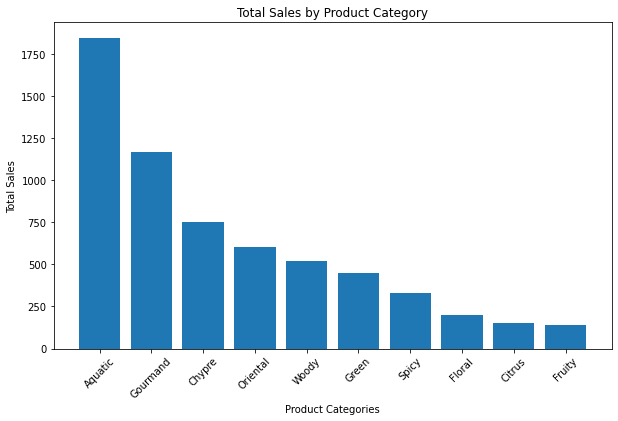

In [27]:
# Plotting
plt.figure(figsize=(10,6))
plt.bar(df_sales['category_name'], df_sales['total_sales'])
plt.xlabel('Product Categories')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()